<div style="background-color:#f0f8ff; padding:15px; border-radius:8px; font-size:16px; line-height:1.6;">

  <h3 style="margin-top:0;">Author: Nikolin Prenga</h3>
  <p><strong>Created:</strong> July 2025</p>

  <p>
    This Jupyter notebook is primarily used to train and validate <strong>YOLOv11</strong> on a custom-annotated dataset derived from <strong>BRISC2025</strong>.
  </p>

  <p>
    The training was conducted in Google Colaboratory using an <strong>L4 GPU</strong>, which significantly reduced training time.
  </p>

  <p>
    Each epoch took approximately one minute to complete, as YOLOv11-small contains roughly <strong>9.4 million parameters</strong>.
  </p>

</div>


In [57]:
#!pip install ultralytics

In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from IPython.display import Image
from collections import Counter
from ultralytics import YOLO
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")



In [ ]:

# Load a COCO-pretrained YOLO11s model from ultralytics
Nikolin_Yolo11 = YOLO("yolo11s.pt")




100%|██████████| 18.4M/18.4M [00:00<00:00, 137MB/s] 


In [ ]:
# Train the YOLOv11 model for 100 epochs using the specified YAML config file for training/validation data.
# Image size is set to 512, batch size to 16, and early stopping is applied with a patience of 10 epochs.

Nikolin_Yolo11.train(
    data="/content/data.yaml",
    epochs=100,
    imgsz=512,
    batch=16,
    name="brain_tumor_yolo",
    device=0,
    patience=10
)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=brain_tumor_yolo, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=

100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 23        [16, 19, 22]  1    820956  ultralytics.nn.modules.head.Detect           [4, [128, 256, 512]]          
YOLO11s summary: 181 layers, 9,429,340 parameters, 9,429,324 gradients, 21.6 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1263.1±517.6 MB/s, size: 41.9 KB)


train: Scanning /content/Yolo_v11_Nikolin_Dataset/train/labels... 4002 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4002/4002 [00:02<00:00, 1596.49it/s]


train: New cache created: /content/Yolo_v11_Nikolin_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 601.3±212.7 MB/s, size: 33.7 KB)


val: Scanning /content/Yolo_v11_Nikolin_Dataset/val/labels... 998 images, 0 backgrounds, 0 corrupt: 100%|██████████| 998/998 [00:00<00:00, 1325.49it/s]

val: New cache created: /content/Yolo_v11_Nikolin_Dataset/val/labels.cache


Plotting labels to runs/detect/brain_tumor_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/brain_tumor_yolo
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.63G      1.242      1.923      1.375          5        512: 100%|██████████| 251/251 [00:33<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.59it/s]


                   all        998       1036      0.835      0.568      0.691      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.29G      1.291      1.297      1.397          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.99it/s]


                   all        998       1036      0.648      0.625      0.681       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.31G      1.285      1.208       1.39          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.79it/s]

                   all        998       1036      0.676      0.593      0.644      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.37G      1.269      1.183      1.385          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.91it/s]


                   all        998       1036      0.829      0.669      0.749      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.41G      1.195      1.085      1.332          4        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all        998       1036      0.759      0.654      0.775      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.45G       1.21       1.05      1.343          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.803      0.728      0.794      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.47G      1.138     0.9553      1.293          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]

                   all        998       1036      0.786      0.756      0.792      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.53G      1.154     0.9769      1.309          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

                   all        998       1036      0.833       0.78      0.825       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.57G      1.134     0.9269      1.293          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all        998       1036      0.839      0.785      0.844       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.61G      1.128     0.9011      1.289          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all        998       1036       0.82      0.797      0.844      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.63G       1.09     0.8664      1.249          4        512: 100%|██████████| 251/251 [00:28<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.97it/s]

                   all        998       1036      0.841      0.815      0.865      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.69G      1.077     0.8444      1.259          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036      0.844      0.783      0.854      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.73G       1.09     0.8421      1.268          1        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.95it/s]


                   all        998       1036      0.871      0.804      0.863      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.77G      1.082     0.8388       1.25          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.92it/s]

                   all        998       1036       0.84      0.785      0.841      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.79G      1.053     0.7986      1.238          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.861      0.824      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.85G       1.06     0.8088      1.232          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.99it/s]

                   all        998       1036       0.88      0.819      0.873       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.89G      1.051     0.7836      1.233          4        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all        998       1036      0.865      0.806      0.873      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.93G      1.041      0.768      1.235          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all        998       1036      0.865      0.844      0.889      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.95G      1.037     0.7649      1.227          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.97it/s]

                   all        998       1036      0.837      0.804       0.85      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.01G       1.02     0.7566      1.218          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.96it/s]

                   all        998       1036      0.833      0.836      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.05G      1.011     0.7493      1.217          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all        998       1036      0.865      0.823      0.882      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.09G      1.018     0.7359      1.218          5        512: 100%|██████████| 251/251 [00:28<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all        998       1036      0.854      0.807      0.869       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.11G      1.023     0.7452       1.22          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all        998       1036       0.88      0.845       0.89      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.17G     0.9786     0.7134      1.192          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all        998       1036      0.876      0.829      0.891      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.21G      1.001     0.7103      1.207          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036      0.871      0.843      0.885       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.25G     0.9803     0.7007      1.193          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all        998       1036      0.886      0.859      0.901      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.27G     0.9796     0.6994      1.193          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all        998       1036      0.884      0.859      0.898      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.33G     0.9881     0.6823      1.197          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

                   all        998       1036      0.874      0.841      0.884       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.37G      0.967     0.6827       1.18          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036      0.868      0.848      0.898      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.58G     0.9641     0.6761      1.179          4        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all        998       1036      0.869      0.842      0.898      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       4.6G     0.9538     0.6613      1.174          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all        998       1036      0.898      0.847      0.898      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.66G     0.9657     0.6518      1.183          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]

                   all        998       1036      0.888      0.867      0.903      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       4.7G     0.9457     0.6372       1.18          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all        998       1036      0.895      0.852      0.902      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.74G     0.9422     0.6338       1.17          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036       0.88       0.86      0.906      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.76G     0.9456     0.6358      1.165          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.98it/s]

                   all        998       1036      0.885      0.859      0.904      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.82G     0.9476      0.633      1.167          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all        998       1036      0.877      0.865      0.903      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.86G     0.9333     0.6211      1.156          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.906      0.846      0.913      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.9G     0.9217     0.5994      1.148          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all        998       1036      0.898      0.869      0.914      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.92G      0.916     0.6172      1.152          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036      0.884      0.855      0.909      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.98G     0.9172     0.6117      1.152          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036      0.902      0.872      0.913      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.02G      0.912     0.6071      1.156          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]

                   all        998       1036      0.886      0.878      0.911      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.06G     0.9145     0.6032       1.15          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.09it/s]

                   all        998       1036      0.902      0.869       0.91       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.08G     0.9142     0.5962      1.144         11        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.892      0.865      0.915      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.14G     0.9219     0.5827      1.149          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]

                   all        998       1036      0.903      0.874       0.91       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.18G     0.9096     0.5967      1.148          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.95it/s]

                   all        998       1036      0.908      0.869      0.912      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.22G     0.9055     0.5846      1.139          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.89it/s]

                   all        998       1036      0.907      0.859       0.91      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.24G     0.8965     0.5791      1.142          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all        998       1036      0.908      0.858      0.903      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       5.3G      0.894     0.5775      1.133          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all        998       1036      0.904      0.859      0.906      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.34G     0.9022     0.5604      1.141          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all        998       1036      0.911      0.883      0.917      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.38G     0.9054     0.5683      1.135          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all        998       1036      0.913      0.866      0.912       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       5.4G     0.8905     0.5706      1.131          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all        998       1036      0.907      0.859      0.909      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.46G     0.8566     0.5425      1.111          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.17it/s]

                   all        998       1036      0.906      0.881       0.92      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       5.5G     0.8765     0.5574      1.121          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all        998       1036      0.919      0.874      0.918      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.54G     0.8717     0.5479      1.122          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.01it/s]

                   all        998       1036      0.916      0.873      0.913      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.56G     0.8629     0.5368      1.118          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.20it/s]

                   all        998       1036      0.909      0.885      0.919       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.62G     0.8525     0.5215      1.106          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all        998       1036       0.91      0.868      0.909      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.66G     0.8412     0.5243      1.106          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.06it/s]

                   all        998       1036      0.914      0.875      0.915      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       5.7G     0.8665     0.5348       1.12          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all        998       1036      0.917      0.868      0.904      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.72G     0.8607      0.529      1.111          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all        998       1036      0.911      0.881      0.921      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       5.8G     0.8399     0.5085      1.102          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all        998       1036      0.915      0.882      0.915      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.84G     0.8453     0.5199      1.103          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all        998       1036      0.927      0.867      0.911      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       5.9G     0.8361     0.5056      1.092          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.08it/s]

                   all        998       1036      0.917      0.875      0.916      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.94G     0.8401     0.5154      1.093          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.17it/s]

                   all        998       1036      0.933      0.883      0.923      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.02G     0.8241     0.5096      1.089          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.21it/s]

                   all        998       1036      0.918      0.867      0.916      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.06G     0.8332     0.5107      1.095          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.22it/s]

                   all        998       1036      0.923      0.877      0.916       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.12G     0.8224     0.5024      1.085          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.19it/s]

                   all        998       1036      0.919      0.879      0.914      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.14G     0.8172     0.5068      1.087          3        512: 100%|██████████| 251/251 [00:28<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all        998       1036        0.9      0.875      0.907      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.22G     0.8113     0.4877      1.082          1        512: 100%|██████████| 251/251 [00:29<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.20it/s]

                   all        998       1036       0.91      0.888      0.914      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.26G      0.827     0.4888      1.092          8        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all        998       1036      0.926      0.881      0.918      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.32G     0.8073      0.478      1.084          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]

                   all        998       1036      0.919      0.888      0.912      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.37G     0.7902      0.474      1.068          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.20it/s]

                   all        998       1036      0.926      0.885      0.912      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.45G      0.796     0.4767      1.073          1        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.08it/s]

                   all        998       1036      0.926      0.884      0.919      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.49G     0.7988     0.4795      1.079          6        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.14it/s]

                   all        998       1036      0.918      0.883      0.919      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.55G     0.7922     0.4697      1.076          1        512: 100%|██████████| 251/251 [00:28<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all        998       1036      0.922      0.873      0.921      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.59G      0.793     0.4697      1.074          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all        998       1036      0.922      0.883      0.918      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.67G     0.7894     0.4707      1.071          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all        998       1036      0.912      0.886      0.915      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.71G     0.7804     0.4606      1.067          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.919      0.877      0.923       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.77G     0.7889     0.4657       1.07          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.15it/s]

                   all        998       1036       0.91       0.89      0.917      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.81G     0.7823      0.451      1.063          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.16it/s]

                   all        998       1036      0.919      0.885      0.914      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.89G     0.7696      0.448       1.06          6        512: 100%|██████████| 251/251 [00:29<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.10it/s]

                   all        998       1036      0.904      0.894      0.911      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.93G     0.7493     0.4431      1.056          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.913      0.882      0.917      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.99G     0.7636     0.4423      1.059          7        512: 100%|██████████| 251/251 [00:29<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all        998       1036      0.921      0.871      0.915      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.02G     0.7675     0.4468       1.06          5        512: 100%|██████████| 251/251 [00:28<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.07it/s]

                   all        998       1036      0.909      0.885      0.911      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       7.1G     0.7517     0.4452       1.05          6        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]

                   all        998       1036      0.924      0.875      0.915      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.16G     0.7579     0.4395      1.052          1        512: 100%|██████████| 251/251 [00:29<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.908      0.893      0.914      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.22G     0.7506     0.4354      1.046          1        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.11it/s]

                   all        998       1036      0.906      0.891      0.912      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.24G     0.7457     0.4323      1.045          5        512: 100%|██████████| 251/251 [00:29<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.07it/s]

                   all        998       1036      0.925      0.875      0.919      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.32G     0.7318     0.4253      1.039          4        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.20it/s]

                   all        998       1036      0.918      0.883      0.919      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.36G      0.744     0.4298       1.05          7        512: 100%|██████████| 251/251 [00:29<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.22it/s]

                   all        998       1036      0.905      0.894      0.919      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.42G     0.7326     0.4229      1.044          3        512: 100%|██████████| 251/251 [00:29<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.17it/s]

                   all        998       1036      0.921      0.877      0.915      0.673


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.46G     0.7585     0.3692      1.035          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.93it/s]

                   all        998       1036      0.914      0.881      0.914       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.54G     0.7395     0.3593      1.022          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.12it/s]

                   all        998       1036        0.9      0.895      0.912      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.58G     0.7397      0.349      1.026          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]

                   all        998       1036      0.901      0.891      0.916      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.64G     0.7284     0.3455       1.02          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all        998       1036      0.902      0.893      0.914      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.66G     0.7218     0.3411      1.014          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.13it/s]

                   all        998       1036      0.909      0.892      0.917      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.74G      0.711     0.3328      1.003          2        512: 100%|██████████| 251/251 [00:29<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]

                   all        998       1036      0.907      0.896      0.914      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       7.8G     0.7119     0.3393      1.006          2        512: 100%|██████████| 251/251 [00:28<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  7.16it/s]

                   all        998       1036      0.917       0.88      0.914      0.679
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 87, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



97 epochs completed in 0.919 hours.
Optimizer stripped from runs/detect/brain_tumor_yolo/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/brain_tumor_yolo/weights/best.pt, 19.2MB

Validating runs/detect/brain_tumor_yolo/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.50it/s]


                   all        998       1036      0.924      0.876      0.919      0.683
                Glioma        229        247      0.864      0.753      0.831      0.523
            Meningioma        265        275      0.973      0.945       0.97      0.733
             Pituitary        291        301      0.935      0.874      0.923      0.586
              No Tumor        213        213      0.925       0.93      0.951      0.889
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/brain_tumor_yolo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f6fc2d7650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
# Load the best-performing YOLOv11 model saved during training (based on validation performance)

best_model_path = 'Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/weights/best.pt'

last_model_path='Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/weights/last.pt'
best_model = YOLO(best_model_path)

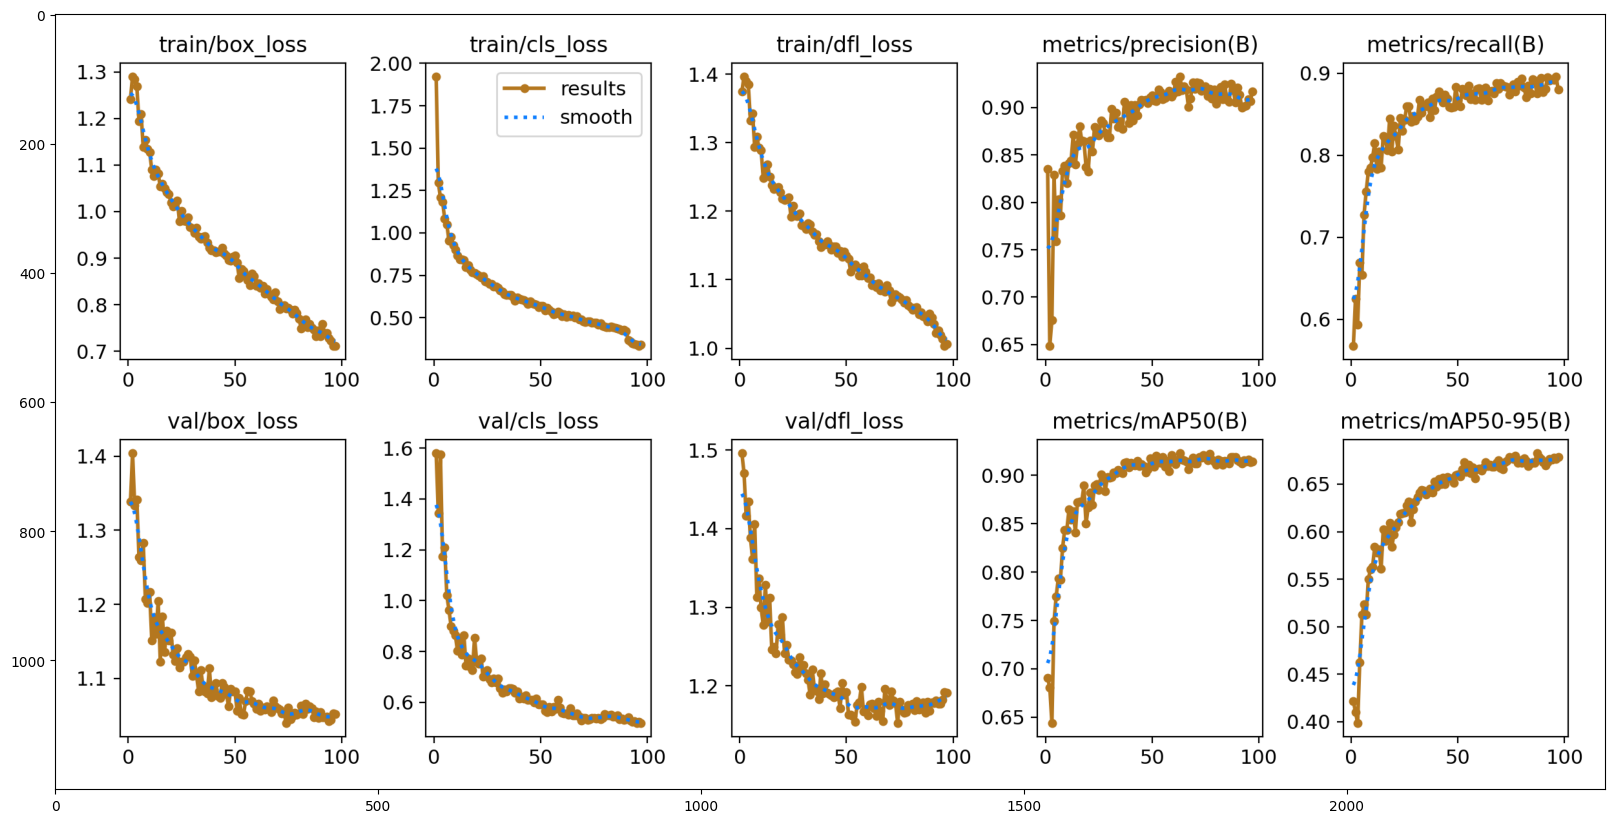

In [ ]:
# Load and display the training and validation metrics image (e.g. losses, precision, recall) generated by YOLOv11 after training


ims = cv2.imread('Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/results.png')

plt.figure(figsize=(20, 20))
plt.imshow(ims)
plt.show()


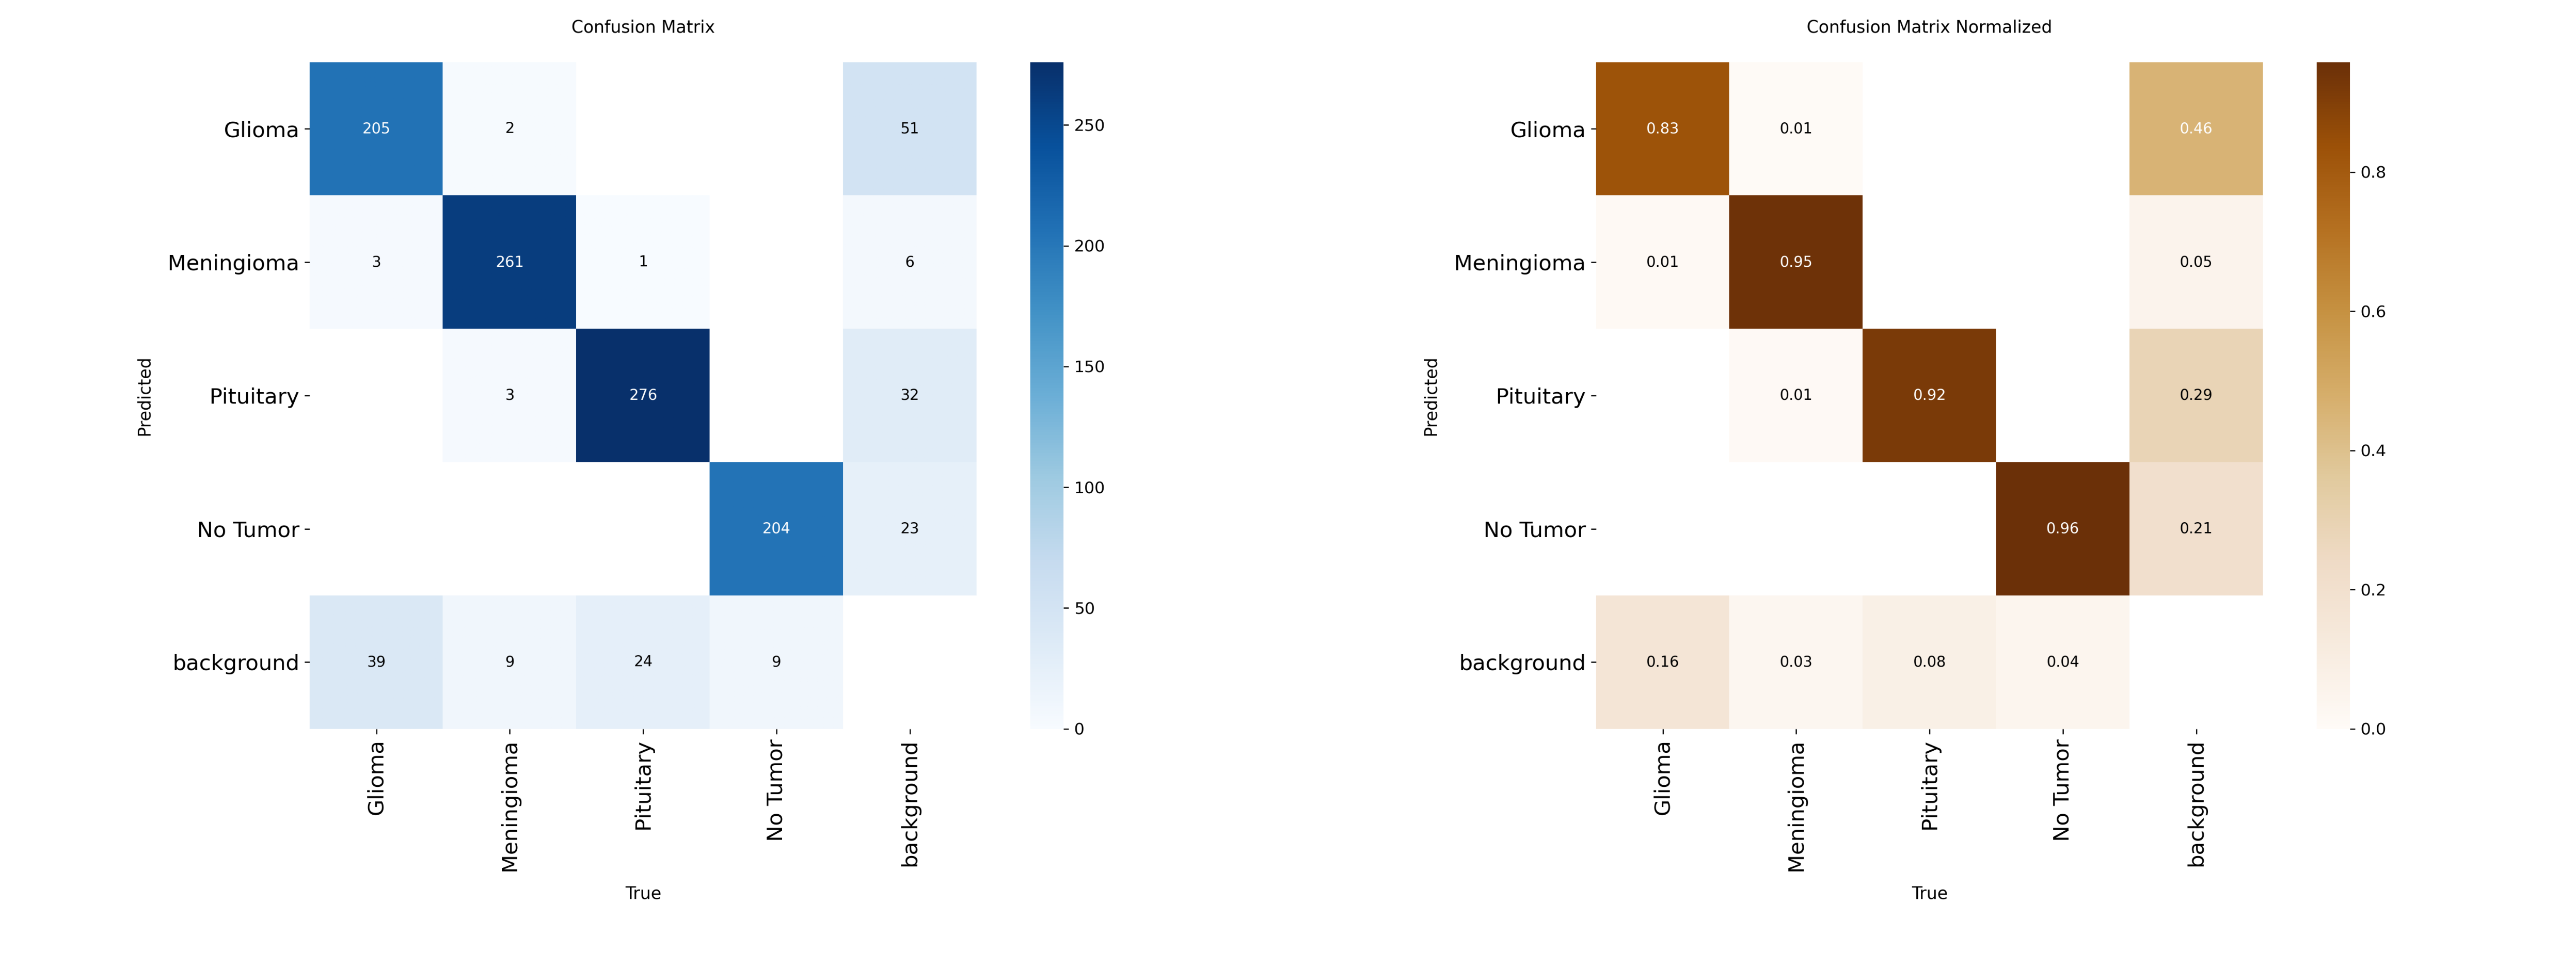

In [ ]:
# Display the confusion matrix and normalized confusion matrix for the validation dataset
confusion_matrix_path='Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/confusion_matrix.png'
confusion_matrix_normalized_path ='Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/confusion_matrix_normalized.png'
conf_matrix_im = plt.imread(confusion_matrix_path)
conf_matrix_normalized_im= cv2.imread(confusion_matrix_normalized_path)




plt.figure(figsize=(50, 70))

plt.subplot(1, 2, 1)
plt.imshow(conf_matrix_im, cmap='Blues')
#plt.title('Confusion Matrix')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix_normalized_im, cmap='Blues')
#plt.title('Normalized Confusion Matrix')
plt.axis('off')

plt.tight_layout()
plt.show()

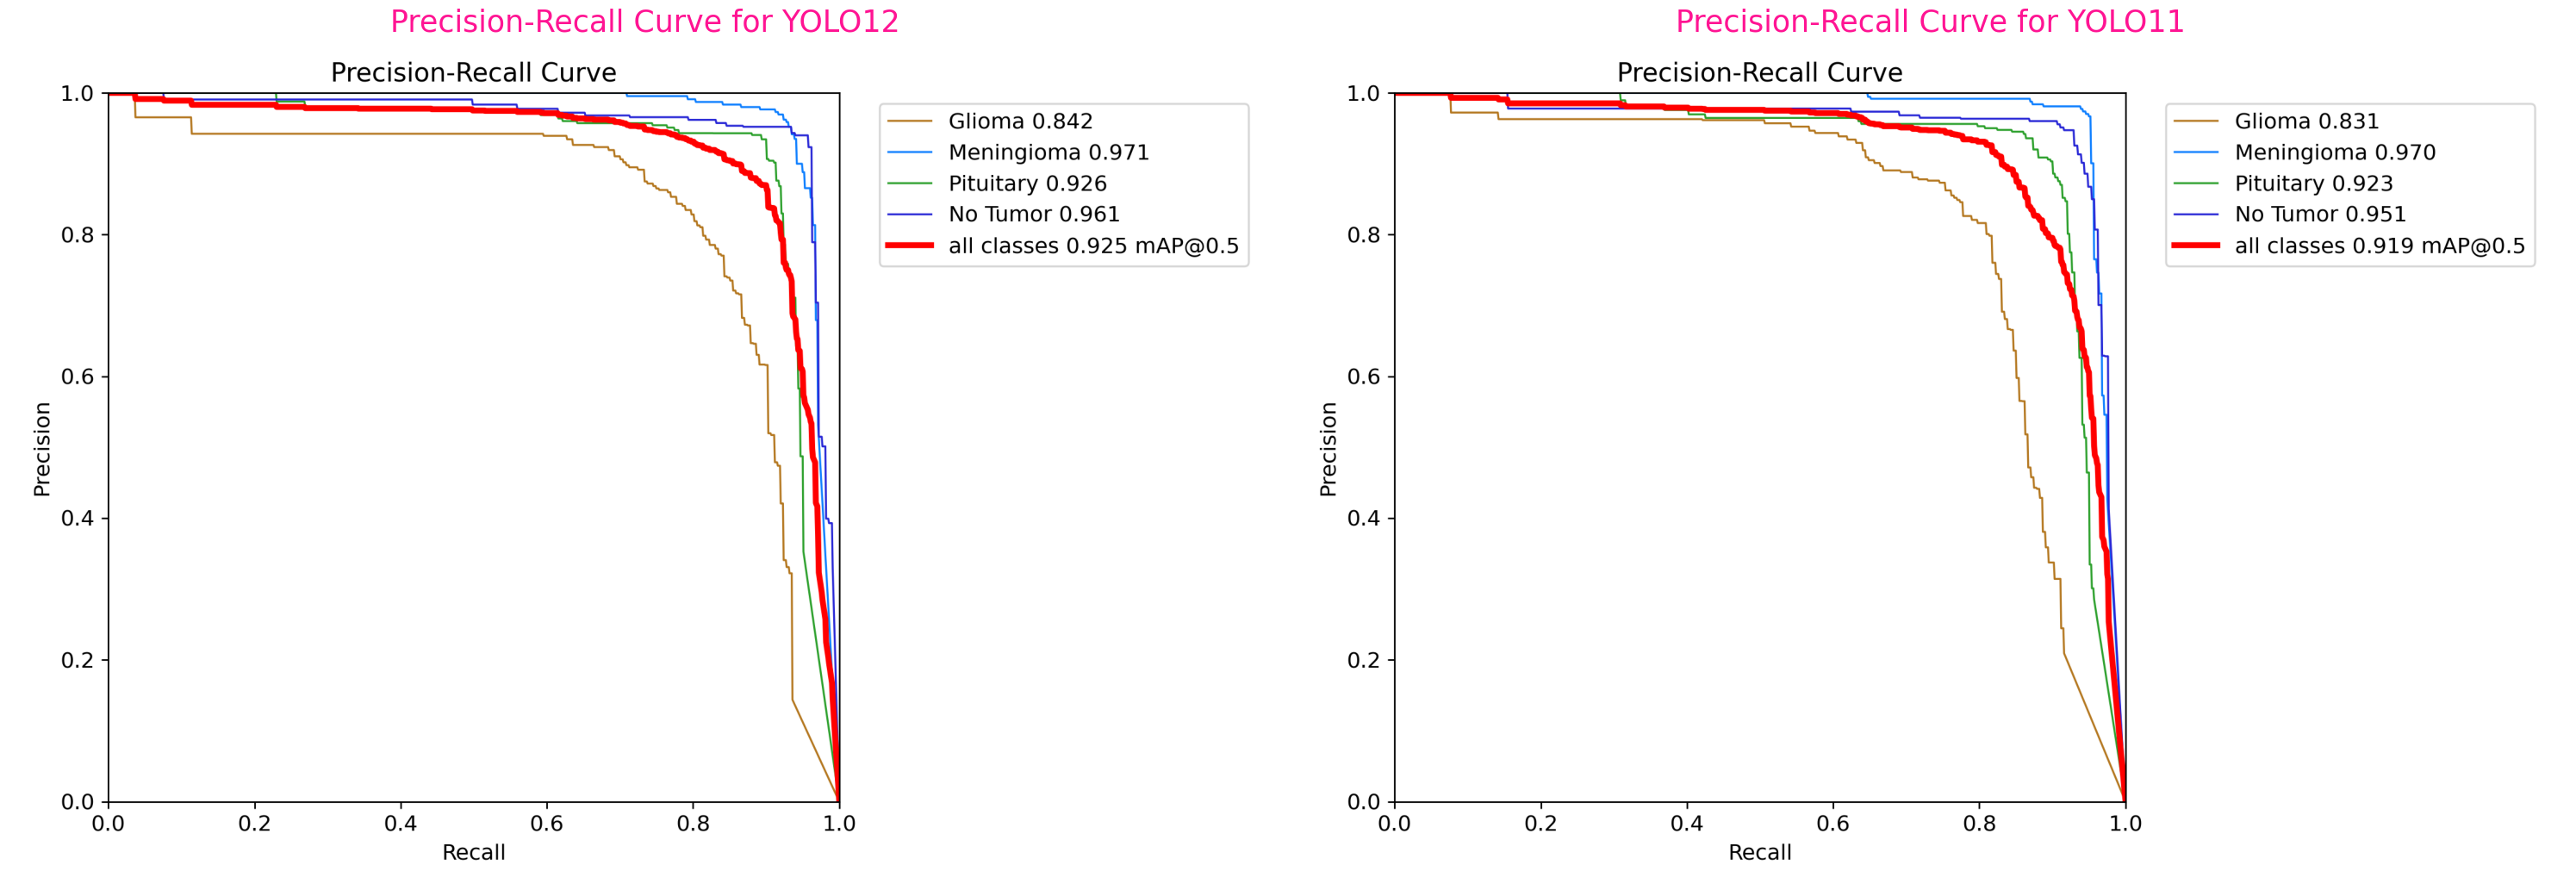

In [ ]:
# Display the Precision-Recall curves for YOLOv12 and YOLOv11 to visualize the trade-off between precision and recall across confidence thresholds

precision_recall_curve_path_v12 = '/Users/nikolin/Desktop/Yolo V8-11/First Try/YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/BoxPR_curve.png'
precision_recall_curve_path_v11 = 'Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/BoxPR_curve.png'

precision_recall_curve_im_v12 = cv2.imread(precision_recall_curve_path_v12)
precision_recall_curve_im_v11 = cv2.imread(precision_recall_curve_path_v11)



plt.figure(figsize=(30, 20))
plt.subplot(1, 2, 1)
plt.imshow(precision_recall_curve_im_v12)
plt.title('Precision-Recall Curve for YOLO12', fontsize=25, c='deeppink')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(precision_recall_curve_im_v11)
plt.title('Precision-Recall Curve for YOLO11', fontsize=25, c='deeppink')
plt.axis('off')
plt.tight_layout()
plt.show()



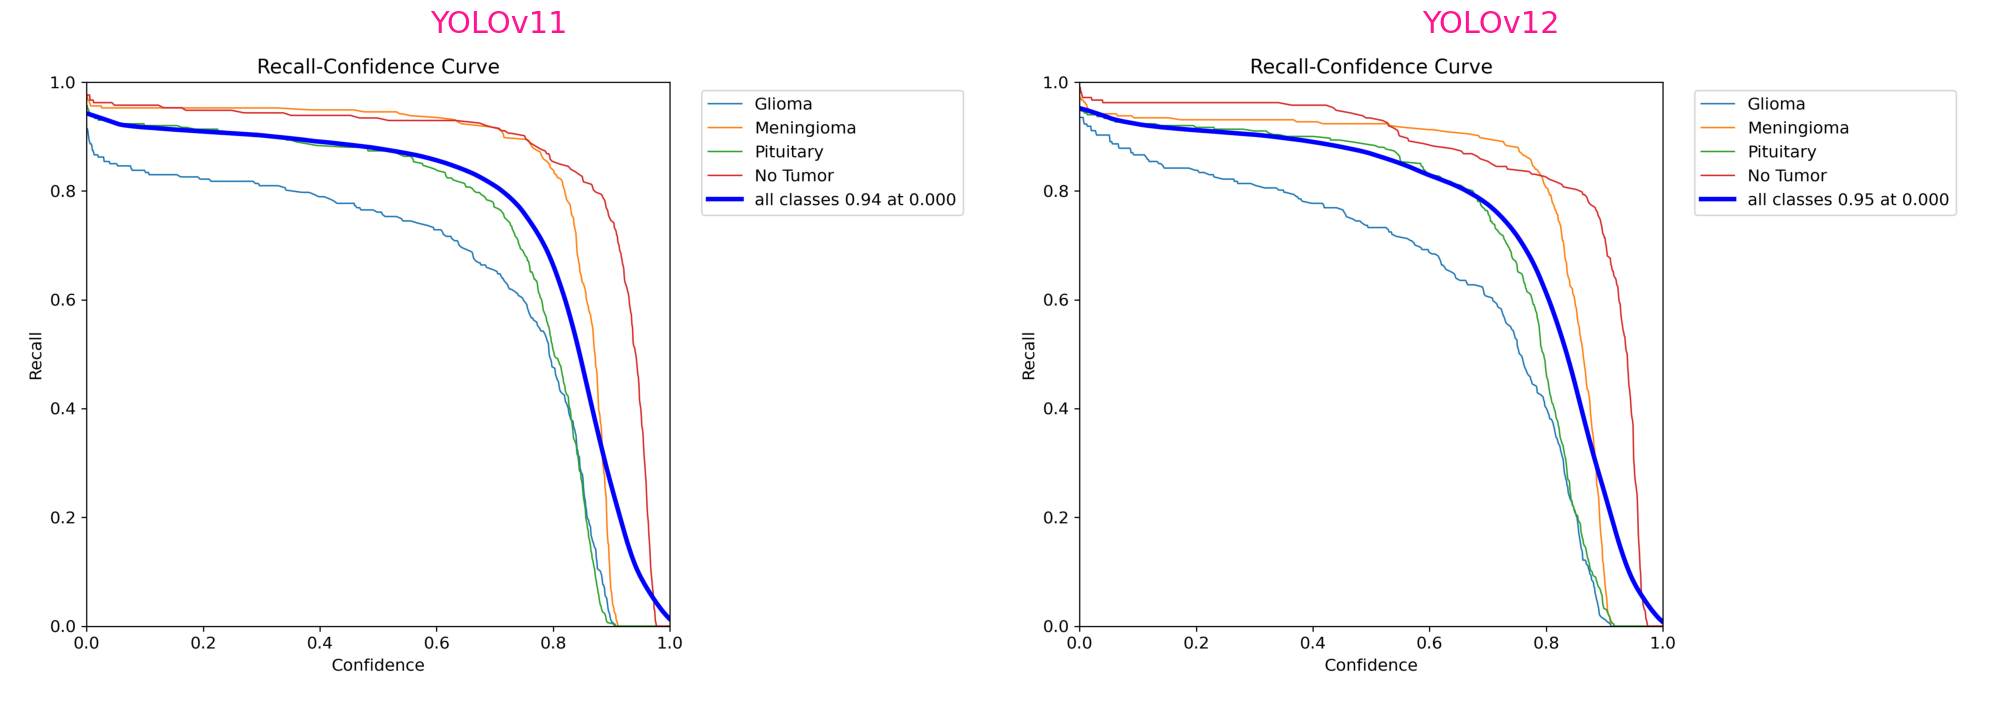

In [ ]:
# Plot  Recall vs. confidence threshold 
recall_yolo_v11_path ='Last_one_v11_100epochs_small/runs/detect/brain_tumor_yolo/BoxR_curve.png'
recall_yolo_v12_path ='/Users/nikolin/Desktop/Yolo V8-11/First Try/YOLO_12_last_100epochs_small/runs/detect/brain_tumor_yolo/BoxR_curve.png'

im_recall_v11 = plt.imread(recall_yolo_v11_path)

im_recall_v12 = plt.imread(recall_yolo_v12_path)

plt.figure(figsize = (20,20))

plt.subplot(1,2,1)

plt.imshow(im_recall_v11)
plt.title('YOLOv11', fontsize=22, c='deeppink')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(im_recall_v12)
plt.title('YOLOv12', fontsize=22, c='deeppink')
plt.axis('off')

plt.tight_layout()
plt.show()




